In [1]:
#loading libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/Aniket/Desktop/house/data.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#shape of data
data.shape

(1460, 81)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Target variable (y)

180921.19589
79415.2918861


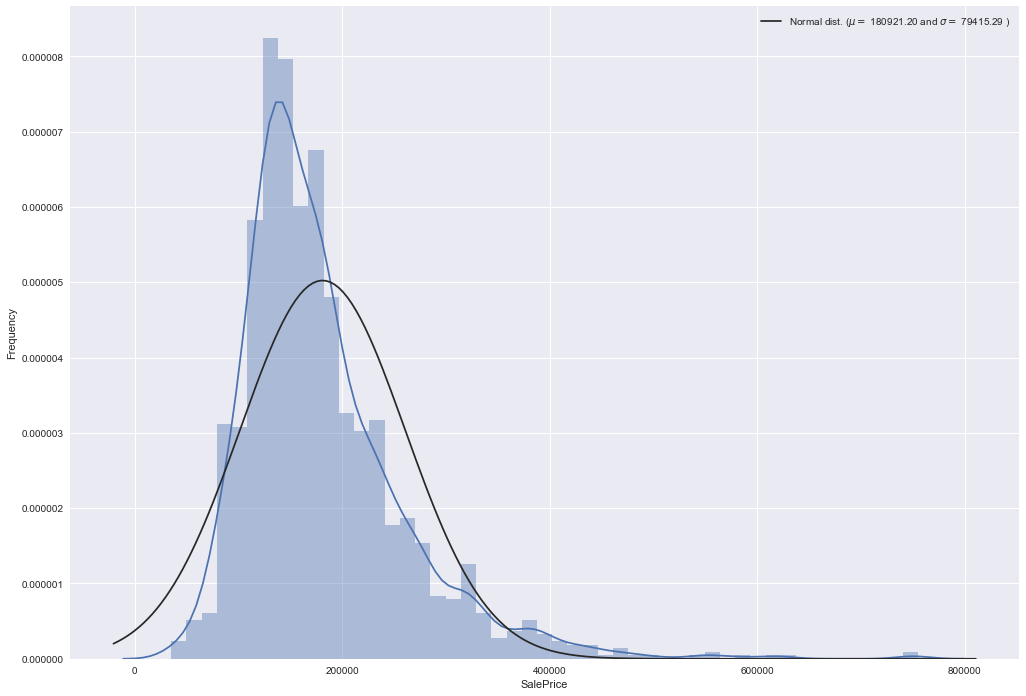

In [6]:
plt.subplots(figsize=(17,12))
sns.distplot(data['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(data['SalePrice'])
print mu
print sigma
# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

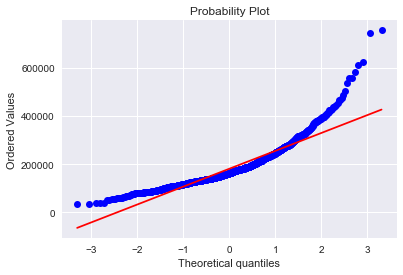

In [7]:
#Probablity plot

fig = plt.figure()
stats.probplot(data['SalePrice'], plot=plt)
plt.show()

This target varibale is right skewed. Now, we need to tranform this variable and make it normal distribution.

#### Here we use log for target variable to make more normal distribution

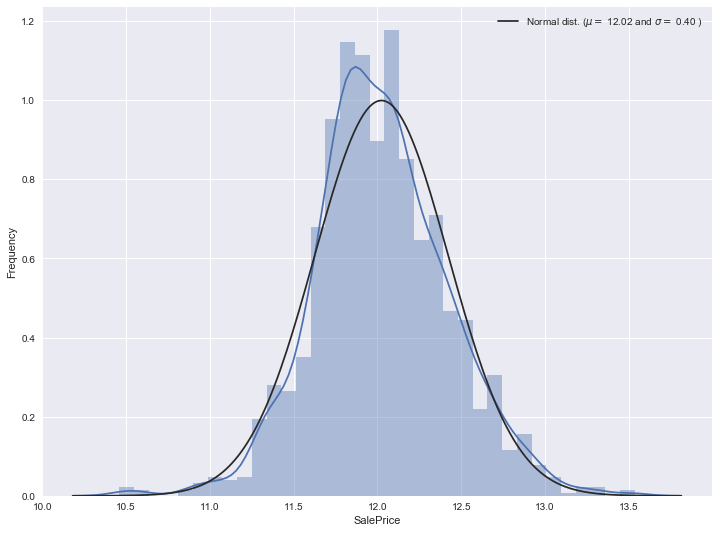

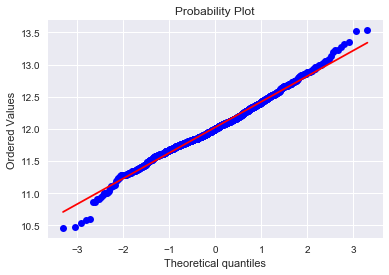

In [8]:
#we use log function which is in numpy
data['SalePrice'] = np.log1p(data['SalePrice'])

#Check again for more normal distribution

plt.subplots(figsize=(12,9))
sns.distplot(data['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(data['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(data['SalePrice'], plot=plt)
plt.show()

### Check the missing values

In [9]:
#Let's check if the data set has any missing values. 
data.columns[data.isnull().any()]

Index([u'LotFrontage', u'Alley', u'MasVnrType', u'MasVnrArea', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2',
       u'Electrical', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish', u'GarageQual', u'GarageCond', u'PoolQC', u'Fence',
       u'MiscFeature'],
      dtype='object')

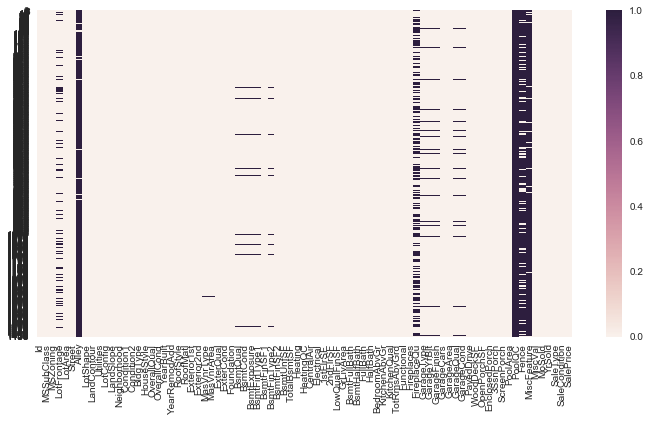

In [10]:
#plot of missing value attributes
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull())
plt.show()

In [11]:
#missing value counts in each of these columns
Isnull = data.isnull().sum()/len(data)*100
#print Isnull
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

### Visualising missing values

In [12]:
#Convert into dataframe
Isnull = Isnull.to_frame()

In [13]:
Isnull.columns = ['count']

In [14]:
Isnull.index.names = ['Name']

In [15]:
print Isnull

                  count
Name                   
PoolQC        99.520548
MiscFeature   96.301370
Alley         93.767123
Fence         80.753425
FireplaceQu   47.260274
LotFrontage   17.739726
GarageYrBlt    5.547945
GarageType     5.547945
GarageFinish   5.547945
GarageQual     5.547945
GarageCond     5.547945
BsmtFinType2   2.602740
BsmtExposure   2.602740
BsmtFinType1   2.534247
BsmtCond       2.534247
BsmtQual       2.534247
MasVnrArea     0.547945
MasVnrType     0.547945
Electrical     0.068493


In [16]:
Isnull['Name'] = Isnull.index

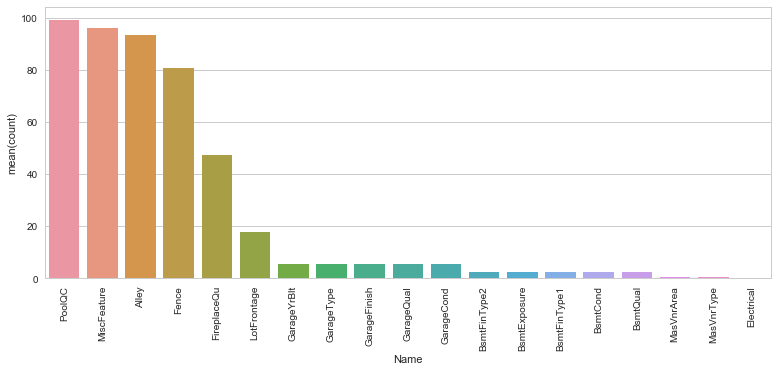

In [17]:
#plot Missing values
plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count', data=Isnull)
plt.xticks(rotation = 90)
plt.show()

### Corralation between train data

In [18]:
data_corr = data.select_dtypes(include=[np.number])

In [19]:
data_corr.shape

(1460, 38)

In [20]:
#Delete Id because that is not need for corralation plot
del data_corr['Id']

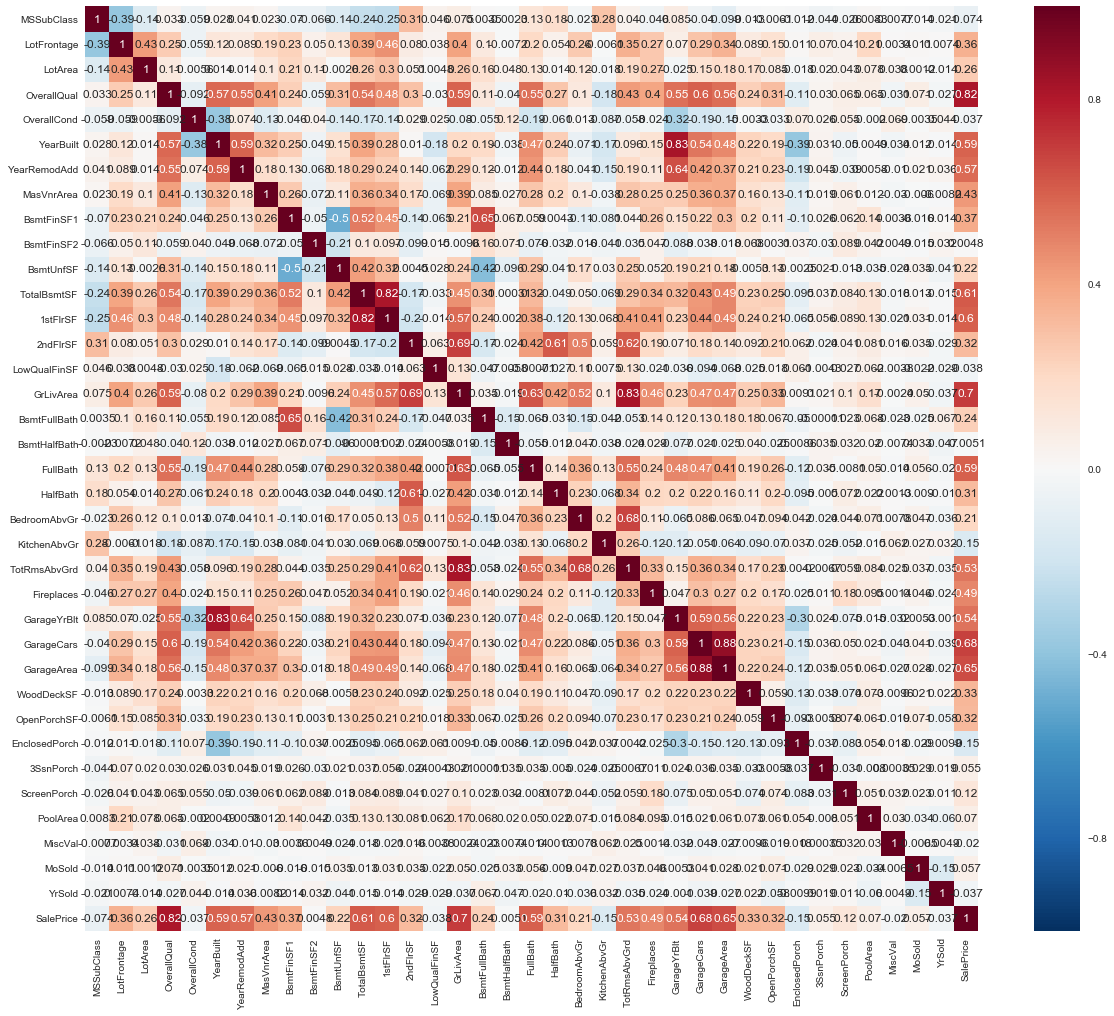

In [21]:
#Coralation plot
corr = data_corr.corr()
plt.subplots(figsize=(20,17))
sns.heatmap(corr, annot=True)

#### Top 50% Corralation  train attributes  with sale-price 

In [22]:
 corr.index

Index([u'MSSubClass', u'LotFrontage', u'LotArea', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'MasVnrArea',
       u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'TotRmsAbvGrd', u'Fireplaces', u'GarageYrBlt',
       u'GarageCars', u'GarageArea', u'WoodDeckSF', u'OpenPorchSF',
       u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MiscVal',
       u'MoSold', u'YrSold', u'SalePrice'],
      dtype='object')

In [23]:
corr['SalePrice']

MSSubClass      -0.073959
LotFrontage      0.355879
LotArea          0.257320
OverallQual      0.817185
OverallCond     -0.036868
YearBuilt        0.586570
YearRemodAdd     0.565608
MasVnrArea       0.430809
BsmtFinSF1       0.372023
BsmtFinSF2       0.004832
BsmtUnfSF        0.221985
TotalBsmtSF      0.612134
1stFlrSF         0.596981
2ndFlrSF         0.319300
LowQualFinSF    -0.037963
GrLivArea        0.700927
BsmtFullBath     0.236224
BsmtHalfBath    -0.005149
FullBath         0.594771
HalfBath         0.313982
BedroomAbvGr     0.209043
KitchenAbvGr    -0.147548
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
GarageYrBlt      0.541073
GarageCars       0.680625
GarageArea       0.650888
WoodDeckSF       0.334135
OpenPorchSF      0.321053
EnclosedPorch   -0.149050
3SsnPorch        0.054900
ScreenPorch      0.121208
PoolArea         0.069798
MiscVal         -0.020021
MoSold           0.057330
YrSold          -0.037263
SalePrice        1.000000
Name: SalePrice, dtype: float64

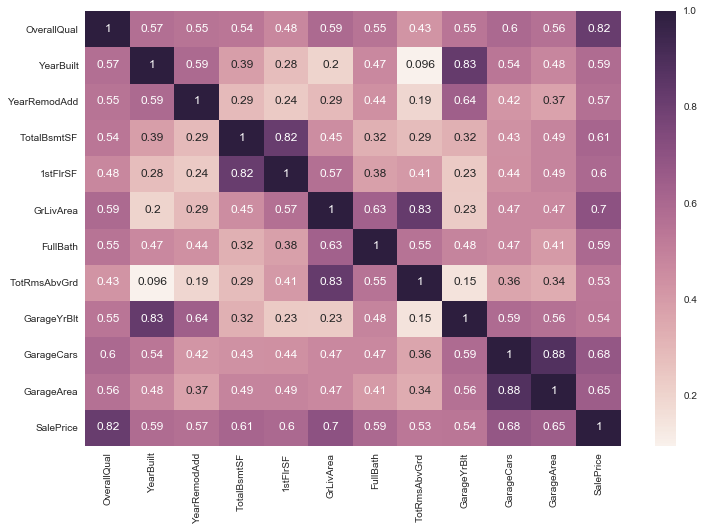

In [24]:
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = data[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

Here OverallQual is highly correlated

In [25]:
#unique value of OverallQual
data.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

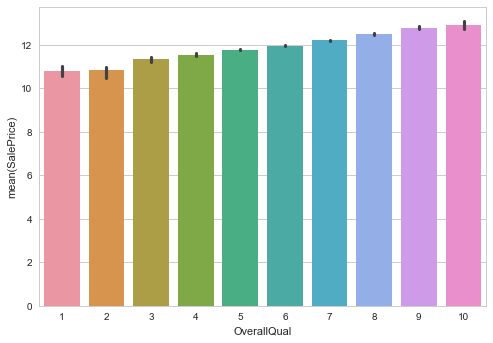

In [26]:
sns.barplot(data.OverallQual, data.SalePrice)

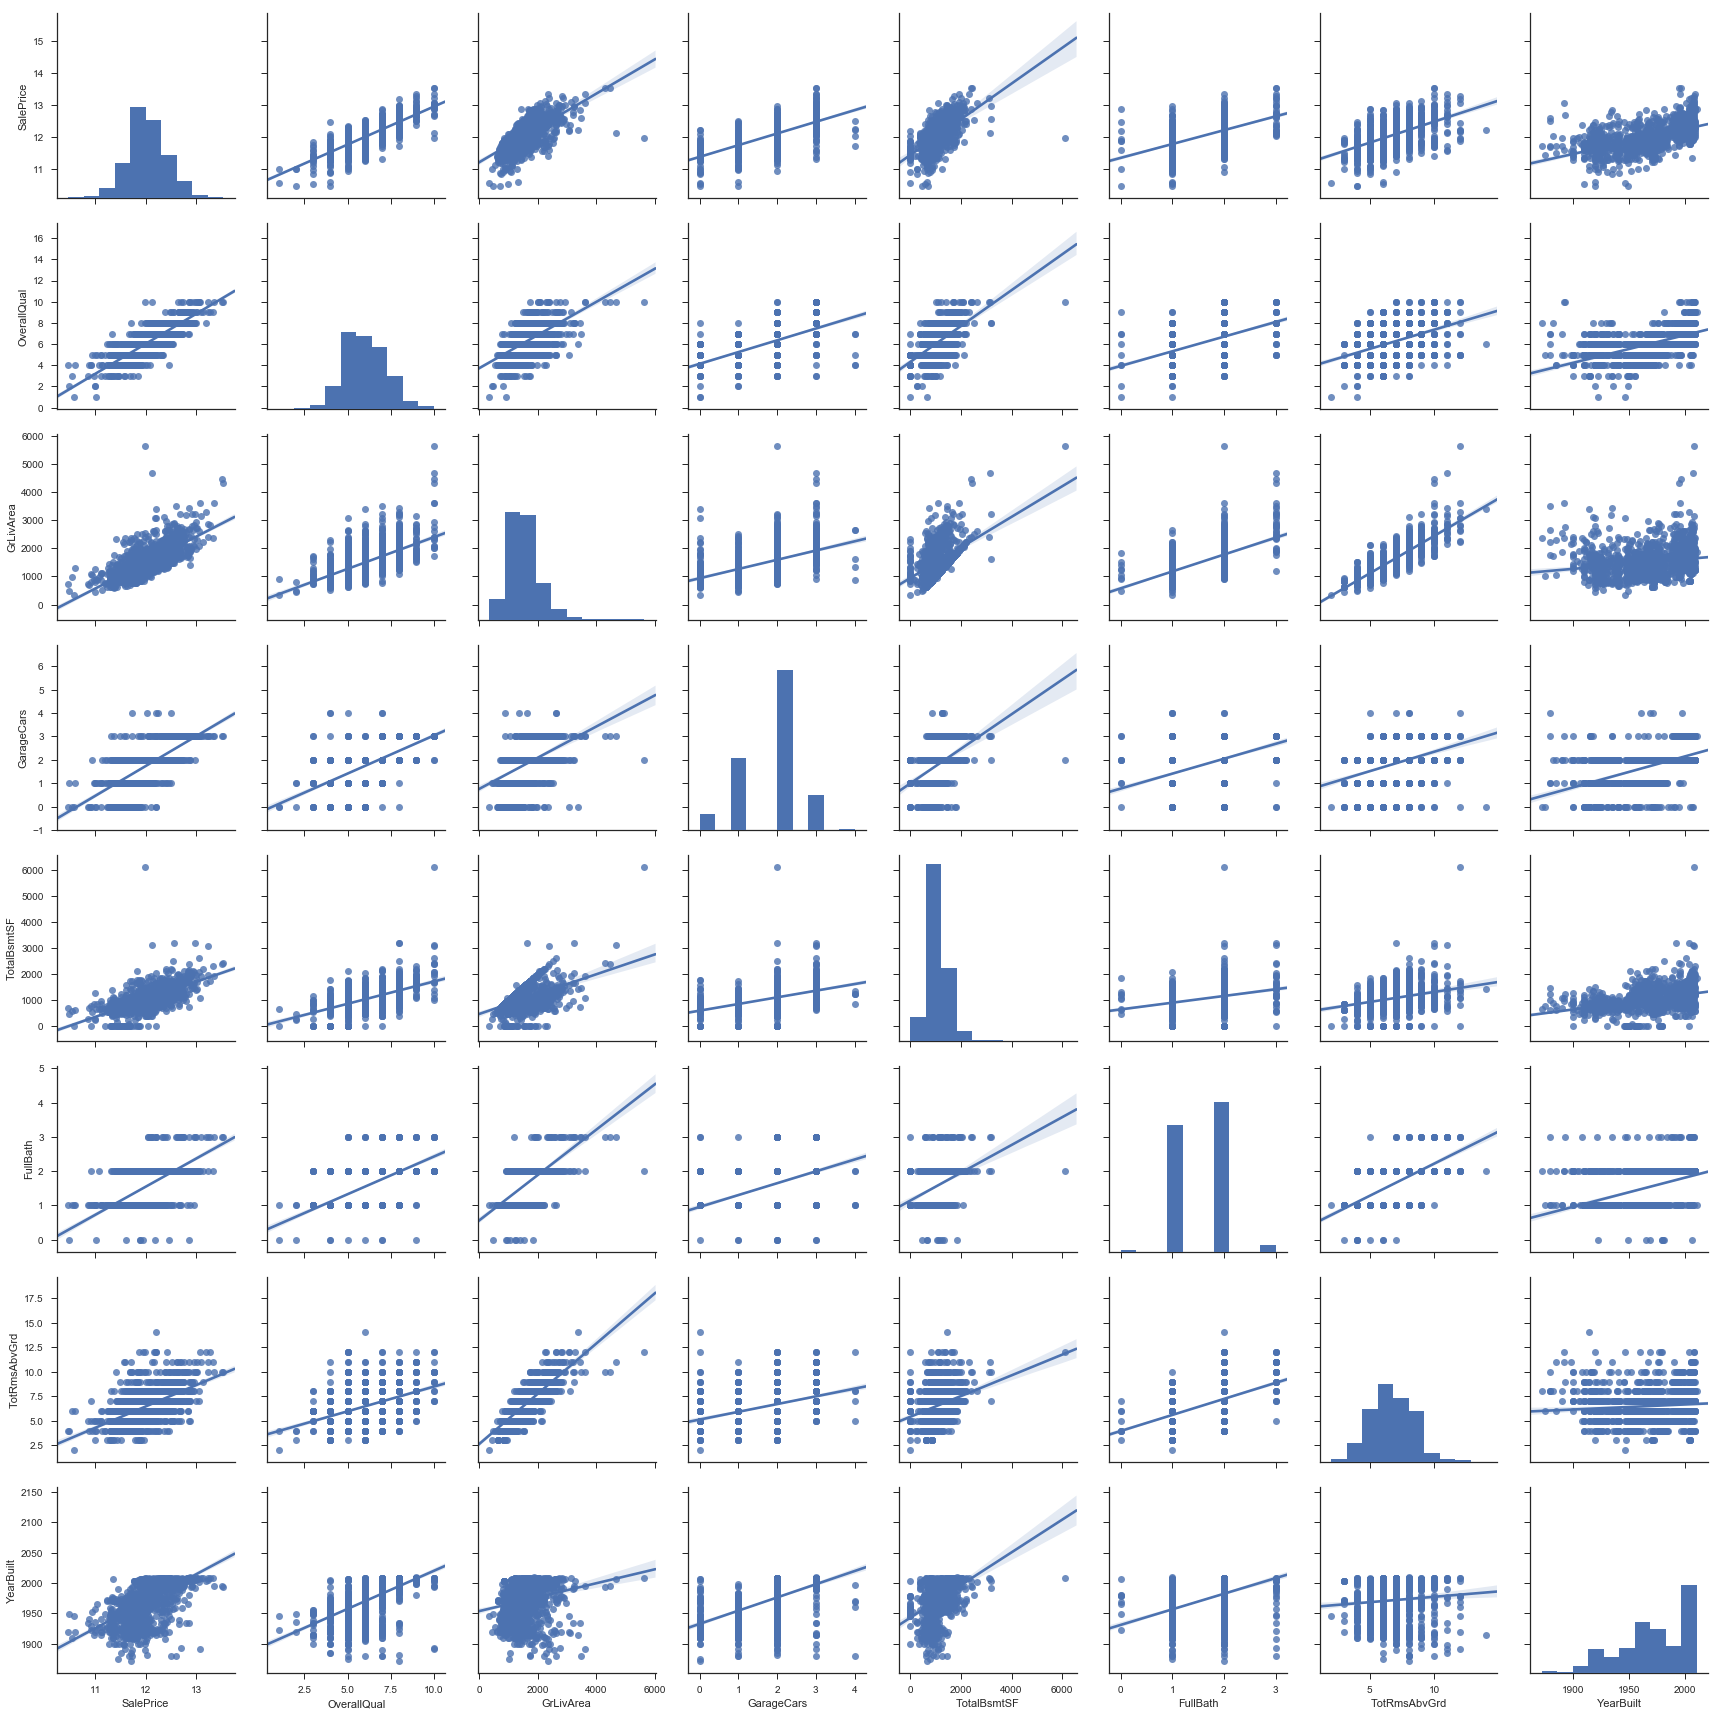

In [27]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.set(style='ticks')
sns.pairplot(data[col], size=3, kind='reg')

In [28]:
print("Find most important features relative to target")
corr = data.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find most important features relative to target


SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

### Imputting missing values

In [29]:
data['PoolQC'] = data['PoolQC'].fillna('None')
data['MiscFeature'] = data['MiscFeature'].fillna('None')
data['Alley'] = data['Alley'].fillna('None')
data['Fence'] = data['Fence'].fillna('None')
data['FireplaceQu'] = data['FireplaceQu'].fillna('None')

In [30]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
data['LotFrontage'] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [31]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    data[col] = data[col].fillna('None')

In [32]:
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    data[col] = data[col].fillna(int(0))

In [33]:
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    data[col] = data[col].fillna('None')

In [34]:
#MasVnrArea : replace with zero
data['MasVnrArea'] = data['MasVnrArea'].fillna(int(0))

In [35]:
#MasVnrType : replace with None
data['MasVnrType'] = data['MasVnrType'].fillna('None')

In [36]:
#dataput mode value 
data['Electrical'] = data['Electrical'].fillna(data['Electrical']).mode()[0]

In [37]:
#no need of Utilities
data = data.drop(['Utilities'], axis=1)

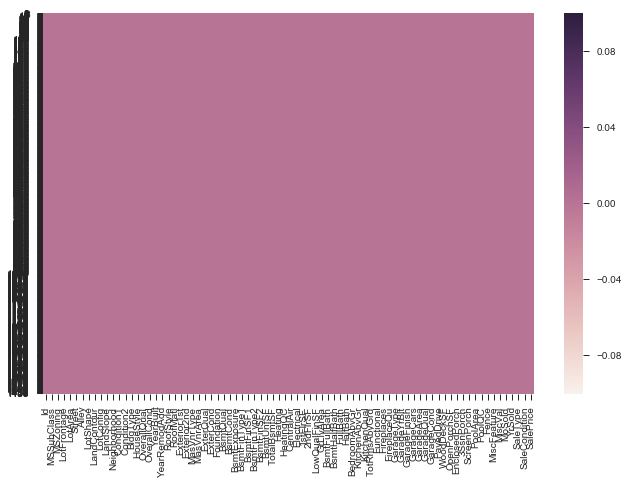

In [38]:
#If there is any null value or not
plt.figure(figsize=(11, 7))
sns.heatmap(data.isnull())

#### Encoding str to int

In [39]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

In [40]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

#### Prepraring data for prediction

In [41]:
#targate is y
Y = data['SalePrice']

In [42]:
del data['SalePrice']

In [43]:
X = data.values
Y = Y.values

In [44]:
# Spliting data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

### Linear Regression

In [45]:
#Train the model
from sklearn import linear_model
model = linear_model.LinearRegression()

In [46]:
#Fit the model
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
#Prediction
print("Predict value " + str(model.predict([X_test[142]])))
print("Real value " + str(Y_test[142]))

Predict value [ 11.54782499]
Real value 11.4616426968


In [53]:
#Accuracy
print("Accuracy --> ", model.score(X_test, Y_test)*100)

('Accuracy --> ', 73.158867516503321)


### RandomForestRegression

In [54]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)

In [55]:
#Fit
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [57]:
#Accuracy
print("Accuracy --> ", model.score(X_test, Y_test)*100)

('Accuracy --> ', 84.275533829642484)
